In [1]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importing necessary libraries and functions :
import pandas as pd
import numpy as np
import tensorflow as tf
from math import sqrt
import time

# Text processing libraries :
!pip install gensim
import gensim 
import re 
from spacy.lang.en import English

# Plotting libraries :
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [7]:
# Regular Expression library
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize #tokenization
from transformers import TFAutoModel
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import AutoTokenizer
from collections import Counter


In [8]:
# sklearn :
import sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve, auc

In [9]:
# Importing the dataset :
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

# Display of the first 5 lines :
df.sample(5)

,target,ids,date,flag,user,text
1594667,4,2192204818,Tue Jun 16 06:40:44 PDT 2009,NO_QUERY,midnightnina,Craving for more ONE TREE HILL! I miss it so m...
1523539,4,2176591297,Mon Jun 15 04:16:21 PDT 2009,NO_QUERY,emirage,is going home.. http://plurk.com/p/112ew1
660990,0,2242938632,Fri Jun 19 12:49:19 PDT 2009,NO_QUERY,honeybc3,@Sexy_Nerd no lol. but its ok. Im gonna take h...
1374526,4,2051448599,Fri Jun 05 22:02:50 PDT 2009,NO_QUERY,AmyLGCampbell,OH MY GOD up at 5:30 this is crazy
382908,0,2053093378,Sat Jun 06 03:14:43 PDT 2009,NO_QUERY,Aodan,Not doin anything today bored to death


In [10]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [11]:
print('length of our data is {} tweets'.format(len(df)))

length of our data is 1600000 tweets


In [12]:
print('the shape of our data is {} tweets'.format(df.shape))

the shape of our data is (1600000, 6) tweets


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [14]:
print(df.dtypes)

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object


In [15]:
# Checking for Null values :
print("number of missing values in the dataframe is {}".format(np.sum(df.isnull().any(axis=1))))

number of missing values in the dataframe is 0


In [16]:
# Rows and columns in the dataset :
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [17]:
# Checking unique Target Values :
df['target'].unique()

array([0, 4], dtype=int64)

In [18]:
df['target'].nunique()

2

In [19]:
# Let's explore our target variable 'target'
print("the number of unique values of the target variable is {}".format(df['target'].nunique()))
print("unique values of target variable are {0} and {1}".format(df['target'].unique()[0],df['target'].unique()[1]))

the number of unique values of the target variable is 2
unique values of target variable are 0 and 4


In [20]:
# Replacing the values to ease understanding :
df['target'] = df['target'].replace(4,1)

In [21]:
# Let's explore the ids feature:
print("The number of unique values of the ids feature is {}".format(df['ids'].nunique()))

The number of unique values of the ids feature is 1598315


In [22]:
# Exploring our date feature :
print("The number of unique values of the date feature is {}".format(df['date'].nunique()))

The number of unique values of the date feature is 774363


In [23]:
# Exploring the flag feature :
print("The number of unique values of the ids feature is {}".format(df['flag'].nunique()))
print("Unique values of ids feature are {}".format(df['flag'].unique()[0]))

The number of unique values of the ids feature is 1
Unique values of ids feature are NO_QUERY


In [24]:
# Explore the user feature :
print("The number of unique values of the user feature is {}".format(df['user'].nunique()))

The number of unique values of the user feature is 659775


In [25]:
# Reviewing duplicates in tweet feature :
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))

The number of unique values of the text feature is 1581466


# Data Visualization of Target Variables 

In [26]:
df.groupby('target').count()

,ids,date,flag,user,text
target,,,,,
0,800000,800000,800000,800000,800000
1,800000,800000,800000,800000,800000


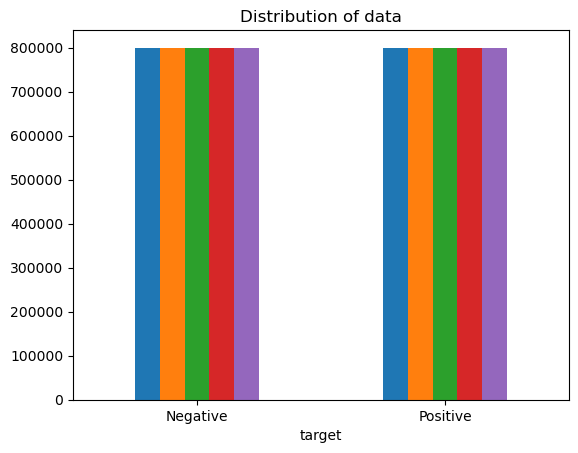

In [27]:
# Plotting the distribution for dataset :
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
# Naming 0 -> Negative , and 4 -> Positive
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists :
text, sentiment = list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

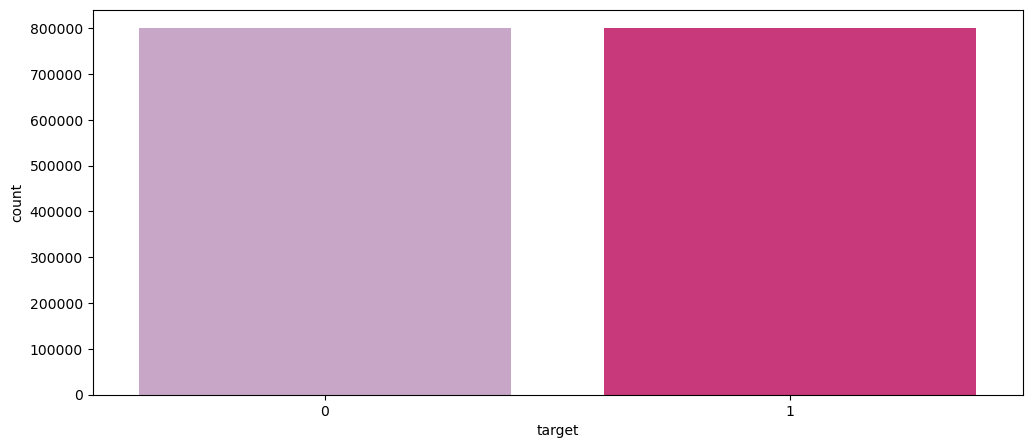

In [28]:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=df, x="target", palette="PuRd")

# data preprocessing


In [29]:
# Lowering Case :
print("=========== Before Lowering case ============\n")
print("\t" + df.loc[10, "text"])
print("\n=========== After Lowering case ===========\n")
df['text'] = df['text'].str.lower()
print("\t" + df.loc[10, "text"])

=========== Before Lowering case ============

	spring break in plain city... it's snowing 

=========== After Lowering case ===========

	spring break in plain city... it's snowing 


In [30]:
# Removal of Mentions:

## Creating a fucntion that will be applied to our datset :
def RemoveMentions(text):
    text_ = re.sub(r"@\S+", "", text)
    return text_


## Applying the function to each row of the data
print("=========== Before Removing Mentions ============\n")
print("\t" + df.loc[5, "text"])
print("\n=========== After Removing Mentions ===========\n")
df["text"] = df["text"].apply(RemoveMentions)
print("\t" + df.loc[5, "text"])

=========== Before Removing Mentions ============

	@kwesidei not the whole crew 

=========== After Removing Mentions ===========

	 not the whole crew 


In [31]:
# Defining a list containing punctuation signs of english :
punctuations_list = string.punctuation


## Defining that will be applied to our datset : 
def RemovePunctuations(text):
    transformator = str.maketrans('', '', punctuations_list)
    return text.translate(transformator)


## Applying the fucntion to all rows :
print("=========== Before Removing Punctuations =============\n")
print("\t" + df.loc[10, "text"])
print("\n=========== After Removing Punctuations \===========\n")
df["text"] = df["text"].apply(RemovePunctuations)
print("\t" + df.loc[10, "text"])

=========== Before Removing Punctuations =============

	spring break in plain city... it's snowing 

=========== After Removing Punctuations \===========

	spring break in plain city its snowing 


In [32]:
df.loc[12]

target                                                    0
ids                                              1467812723
date                           Mon Apr 06 22:20:19 PDT 2009
flag                                               NO_QUERY
user                                                   TLeC
text       i couldnt bear to watch it  and i thought the...
Name: 12, dtype: object

In [33]:
# Getting the pre defined stop words from nltk library :
stopwords = stopwords.words('english')

## Copying the df to use other libraries (spacy and gensim)
df_copy1 = df.loc[:100].copy(deep=True)
df_copy2 = df.copy(deep=True)  # deep copy to create another df 

## Applying the fucntion to all rows
print("=========== Before Removing Stop words ============\n")
print("\t" + df_copy2.loc[12, "text"])
print("\n=========== After Removing Stop words ===========\n")

## Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_copy2['text'] = df_copy2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
print("\t" + df_copy2.loc[12, "text"])

=========== Before Removing Stop words ============

	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words ===========

	couldnt bear watch thought ua loss embarrassing


In [34]:
df.loc[12]

target                                                    0
ids                                              1467812723
date                           Mon Apr 06 22:20:19 PDT 2009
flag                                               NO_QUERY
user                                                   TLeC
text       i couldnt bear to watch it  and i thought the...
Name: 12, dtype: object

In [35]:
## Creating a fucntion that will be applied to our datset :
def RemoveStopsSpacy(text):
    # Load English tokenizer, tagger, parser, NER and word vectors
    nlp = English()

    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(text)

    # Create list of word tokens
    token_list = []
    for token in my_doc:
        token_list.append(token.text)
    # Create list of word tokens after removing stopwords
    filtered_sentence = []

    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    return filtered_sentence


## Applying the fucntion to all rows
print("=========== Before Removing Stop words with spaCy ===========\n")
print("\t" + df_copy1.loc[12, "text"])
print("\n=========== After Removing Stop words with spaCy ===========\n")

## Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_copy1['text'] = df_copy1['text'].apply(lambda x: ' '.join(RemoveStopsSpacy(x)))
print("\t" + df_copy1.loc[12, "text"])

=========== Before Removing Stop words with spaCy ===========

	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words with spaCy ===========

	  nt bear watch   thought ua loss embarrassing     


In [36]:
df.loc[12]

target                                                    0
ids                                              1467812723
date                           Mon Apr 06 22:20:19 PDT 2009
flag                                               NO_QUERY
user                                                   TLeC
text       i couldnt bear to watch it  and i thought the...
Name: 12, dtype: object

In [37]:
## Applying the fucntion to all rows
print("=========== Before Removing Stop words with Gensim =======\n")
print("\t" + df.loc[12, "text"])
print("\n=========== After Removing Stop words with Gensim =======\n")
df['text'] = df['text'].apply(lambda x: gensim.parsing.preprocessing.remove_stopwords(x))
print("\t" + df.loc[12, "text"])

=========== Before Removing Stop words with Gensim =======

	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words with Gensim =======

	bear watch thought ua loss embarrassing


In [38]:
## Creating a fucntion that will be applied to our datset :
def RemoveLinks(text):
    return re.sub(r"http\S+", "", text)


## Applying the fucntion to all rows of our dataset :
print("=========== Before Removing Hyperlinks =======\n")
print("\t" + df.loc[0, "text"])  # let's see for example the first row, which contains an hyperlink.
print("\n=========== After Removing Hyperlinks =======\n")
df['text'] = df['text'].apply(RemoveLinks)
print("\t" + df.loc[0, "text"])

=========== Before Removing Hyperlinks =======

	httptwitpiccom2y1zl awww thats bummer shoulda got david carr day d

=========== After Removing Hyperlinks =======

	 awww thats bummer shoulda got david carr day d


In [39]:
## Creating a fucntion that will be applied to our datset :
def RemoveNumbers(text):       
    return re.sub(r"[0-9]+", "", text)

## Applying the fucntion to all rows
print("=========== Before Removing Numbers =======\n")
print("\t" + df.loc[2,"text"])  #let's see for example the thirs row, which contains an number 50
print("\n=========== After Removing Numbers ========\n")
df['text'] = df['text'].apply(RemoveNumbers)
print("\t" + df.loc[2,"text"])

=========== Before Removing Numbers =======

	dived times ball managed save 50 rest bounds

=========== After Removing Numbers ========

	dived times ball managed save  rest bounds


In [40]:
## Creating a fucntion that will be applied to our datset :
def RemoveWhitespaces(text):
    text=text.strip()  # Leading and trailing whitespaces are removed
    return re.sub(r" +"," ",text)

## Applying the fucntion to all rows :
df['text'] = df['text'].apply(lambda x: RemoveWhitespaces(x))

In [41]:
# And now, let's see our tweet content feature:
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))
print("The total number of rows in our dataframe is : {}".format(len(df)))
print("The number of duplicated rows in our dataframe is : {}".format(len(df)-df['text'].nunique()))

The number of unique values of the text feature is 1461480
The total number of rows in our dataframe is : 1600000
The number of duplicated rows in our dataframe is : 138520


In [42]:
# Removing duplicate row records but keeping original text : ( we only keep the first duplicate )
df = df.drop_duplicates(subset='text', keep='first')

In [43]:
# Checking if duplicates have been removed:
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))
print("The total number of rows in our dataframe is : {}".format(len(df)))
print("The number of duplicated rows in our dataframe is : {}".format(len(df)-df['text'].nunique()))

The number of unique values of the text feature is 1461480
The total number of rows in our dataframe is : 1461480
The number of duplicated rows in our dataframe is : 0


In [44]:
# Viewing the initial dataframe columns :
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [45]:
df=df.drop(['ids', 'date', 'flag', 'user'], axis = 1)

In [46]:
df.columns

Index(['target', 'text'], dtype='object')

In [47]:
# NLTK (Natural Language Toolkit) provides a utility function for tokenizing data.
df['tokenized_tweets'] = df['text'].apply(word_tokenize)
df.head()

,target,text,tokenized_tweets
0,0,awww thats bummer shoulda got david carr day d,"[awww, thats, bummer, shoulda, got, david, car..."
1,0,upset update facebook texting result school to...,"[upset, update, facebook, texting, result, sch..."
2,0,dived times ball managed save rest bounds,"[dived, times, ball, managed, save, rest, bounds]"
3,0,body feels itchy like,"[body, feels, itchy, like]"
4,0,behaving im mad,"[behaving, im, mad]"


In [48]:
# Creating an instance of the stemmer :
stemmer = PorterStemmer()

## Creating a fucntion that will be applied to our datset :
def Stemmer(text):
    return " ".join([stemmer.stem(word) for word in text])

## Applying the fucntion to all rows :
df['tokenized_tweets_stemmed'] = df['tokenized_tweets'].apply(lambda text: Stemmer(text))

In [49]:
# Checking the results :
df.head(10)

,target,text,tokenized_tweets,tokenized_tweets_stemmed
0,0,awww thats bummer shoulda got david carr day d,"[awww, thats, bummer, shoulda, got, david, car...",awww that bummer shoulda got david carr day d
1,0,upset update facebook texting result school to...,"[upset, update, facebook, texting, result, sch...",upset updat facebook text result school today ...
2,0,dived times ball managed save rest bounds,"[dived, times, ball, managed, save, rest, bounds]",dive time ball manag save rest bound
3,0,body feels itchy like,"[body, feels, itchy, like]",bodi feel itchi like
4,0,behaving im mad,"[behaving, im, mad]",behav im mad
5,0,crew,[crew],crew
6,0,need hug,"[need, hug]",need hug
7,0,hey long time yes rains bit bit lol im fine th...,"[hey, long, time, yes, rains, bit, bit, lol, i...",hey long time ye rain bit bit lol im fine than...
8,0,nope didnt,"[nope, didnt]",nope didnt
9,0,que muera,"[que, muera]",que muera


In [50]:
# Creating an instance of the limmatizer :
wordnet_lemmatizer = WordNetLemmatizer()

# Applying the limmatizer to all rows:
df['tokenized_tweets_stemmed_lemmatized'] = df['tokenized_tweets_stemmed'].apply(
    lambda text: wordnet_lemmatizer.lemmatize(text, pos="v"))

In [51]:
df.head(50)

,target,text,tokenized_tweets,tokenized_tweets_stemmed,tokenized_tweets_stemmed_lemmatized
0,0,awww thats bummer shoulda got david carr day d,"[awww, thats, bummer, shoulda, got, david, car...",awww that bummer shoulda got david carr day d,awww that bummer shoulda got david carr day d
1,0,upset update facebook texting result school to...,"[upset, update, facebook, texting, result, sch...",upset updat facebook text result school today ...,upset updat facebook text result school today ...
2,0,dived times ball managed save rest bounds,"[dived, times, ball, managed, save, rest, bounds]",dive time ball manag save rest bound,dive time ball manag save rest bound
3,0,body feels itchy like,"[body, feels, itchy, like]",bodi feel itchi like,bodi feel itchi like
4,0,behaving im mad,"[behaving, im, mad]",behav im mad,behav im mad
5,0,crew,[crew],crew,crew
6,0,need hug,"[need, hug]",need hug,need hug
7,0,hey long time yes rains bit bit lol im fine th...,"[hey, long, time, yes, rains, bit, bit, lol, i...",hey long time ye rain bit bit lol im fine than...,hey long time ye rain bit bit lol im fine than...
8,0,nope didnt,"[nope, didnt]",nope didnt,nope didnt
9,0,que muera,"[que, muera]",que muera,que muera


In [52]:
# Saving our dataframe :
df.to_csv("cleaned.csv")

In [53]:
df.head(2)

,target,text,tokenized_tweets,tokenized_tweets_stemmed,tokenized_tweets_stemmed_lemmatized
0,0,awww thats bummer shoulda got david carr day d,"[awww, thats, bummer, shoulda, got, david, car...",awww that bummer shoulda got david carr day d,awww that bummer shoulda got david carr day d
1,0,upset update facebook texting result school to...,"[upset, update, facebook, texting, result, sch...",upset updat facebook text result school today ...,upset updat facebook text result school today ...


# Generating a word cloud for positive tweets:

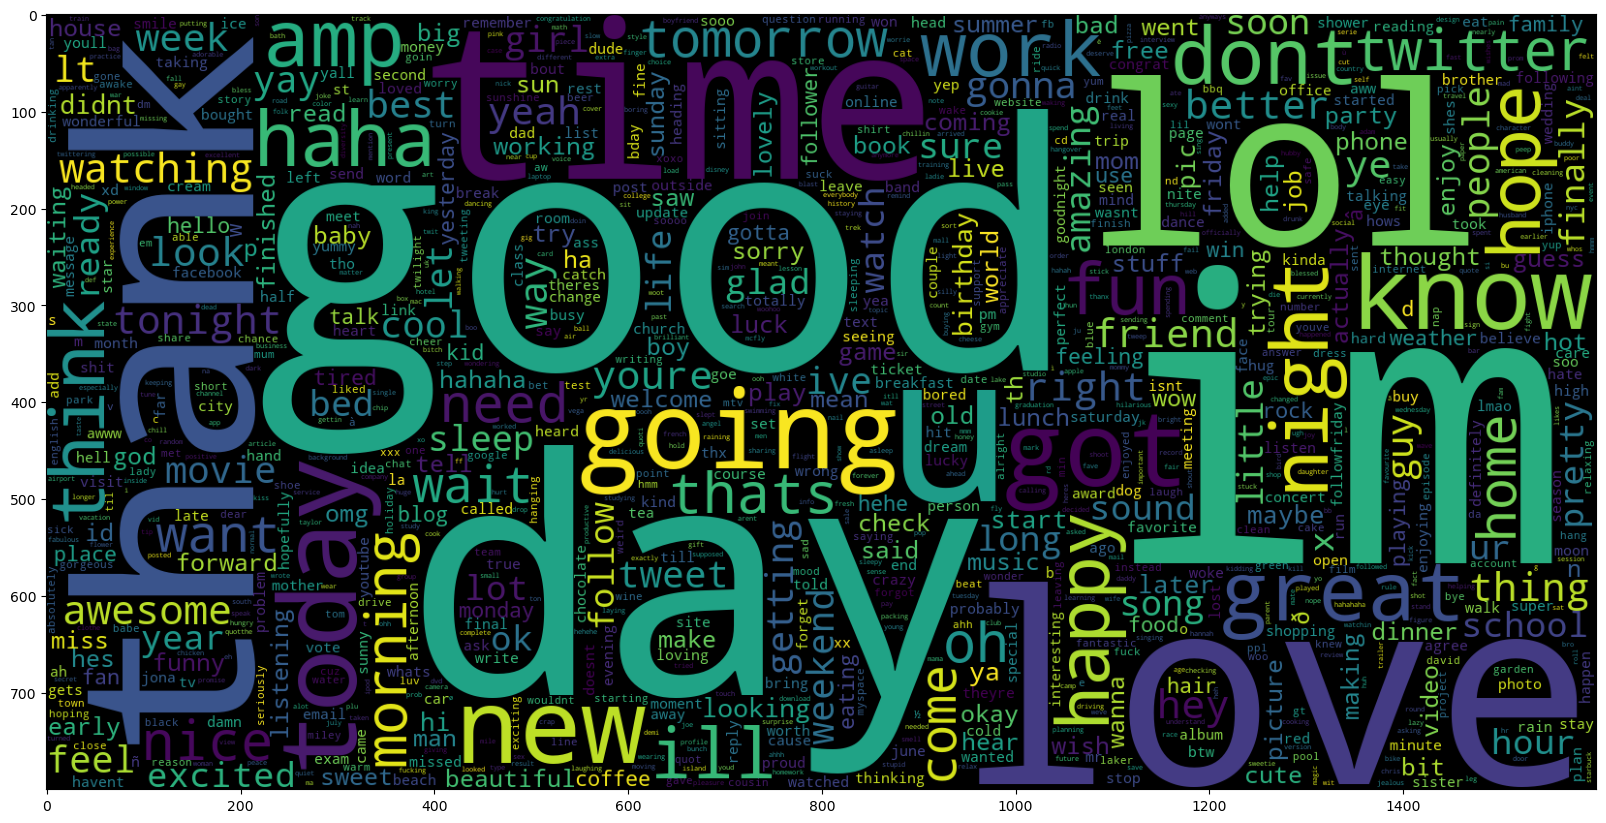

In [54]:
# Plot a cloud of words for positive tweets :
df_pos = df['text'][800000:]  # selecting the positive tweets.
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(df_pos))
plt.figure(figsize=(20, 20))
plt.imshow(wc)

# Generating a word cloud for negative tweets:

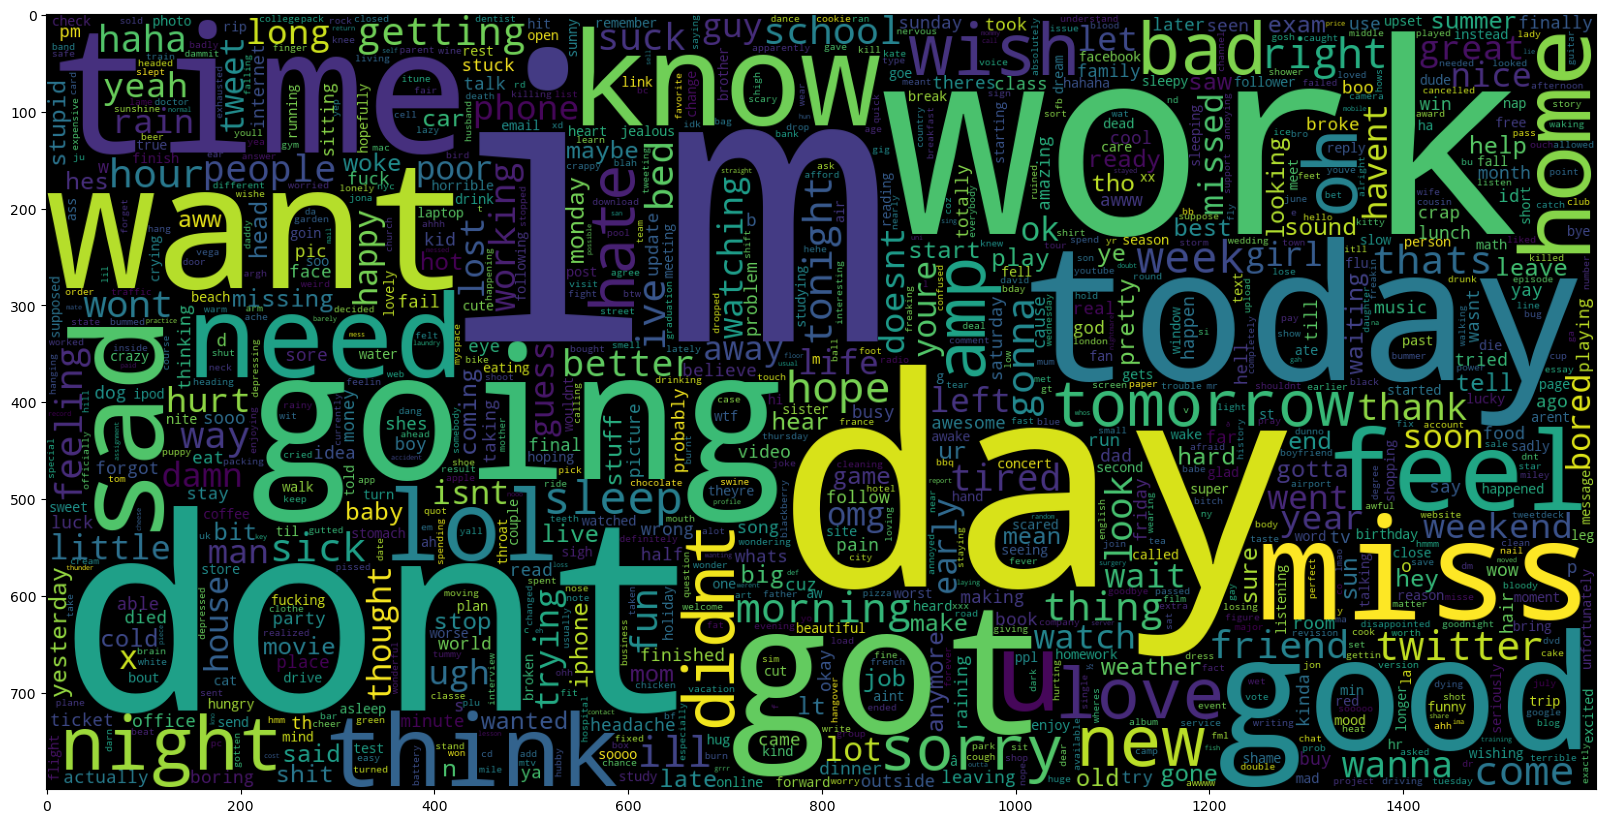

In [55]:
# Plot a cloud of words for negative tweets :
df_neg = df['text'][:800000] # selecting the negative tweets.
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(df_neg))
plt.imshow(wc)

In [56]:
# Calculating tweet’s lenght :
df["text_length"] = df["text"].apply(len)


# let's show the mean word count of each sentiment :
round(pd.DataFrame(df.groupby("target").text_length.mean()),2)

,text_length
target,
0,41.25
1,40.92


# Splitting our data into Train and Test Subset

In [57]:
# Generating one row :
df_reduced = df.sample(frac =.10)
  
# Displaying the reduced dataset :
df_reduced

,target,text,tokenized_tweets,tokenized_tweets_stemmed,tokenized_tweets_stemmed_lemmatized,text_length
781080,0,having trouble sleeping cuz freezing butt,"[having, trouble, sleeping, cuz, freezing, butt]",have troubl sleep cuz freez butt,have troubl sleep cuz freez butt,41
820729,1,try brazzaz brazilian steakhouse n dearborn do...,"[try, brazzaz, brazilian, steakhouse, n, dearb...",tri brazzaz brazilian steakhous n dearborn dow...,tri brazzaz brazilian steakhous n dearborn dow...,57
13444,0,everyday new meets twilight cast member vancou...,"[everyday, new, meets, twilight, cast, member,...",everyday new meet twilight cast member vancouv...,everyday new meet twilight cast member vancouv...,63
1296882,1,thinks nemi amazingg xo,"[thinks, nemi, amazingg, xo]",think nemi amazingg xo,think nemi amazingg xo,23
1130310,1,eating creme brulee night break yumm,"[eating, creme, brulee, night, break, yumm]",eat creme brule night break yumm,eat creme brule night break yumm,36
...,...,...,...,...,...,...
922648,1,cough colds harsh bwahehehe,"[cough, colds, harsh, bwahehehe]",cough cold harsh bwaheheh,cough cold harsh bwaheheh,27
1347705,1,national donut day free krispy kreme,"[national, donut, day, free, krispy, kreme]",nation donut day free krispi kreme,nation donut day free krispi kreme,36
1442382,1,tired long day car shoppingmissin bed schoolcp...,"[tired, long, day, car, shoppingmissin, bed, s...",tire long day car shoppingmissin bed schoolcp ...,tire long day car shoppingmissin bed schoolcp ...,72
350121,0,saw color letters thing came mind,"[saw, color, letters, thing, came, mind]",saw color letter thing came mind,saw color letter thing came mind,33


In [58]:
print( "The shape of the original dataset: " + str(df.shape))
print( "The shape of the reduced dataset: " + str(df_reduced.shape))

The shape of the original dataset: (1461480, 6)
The shape of the reduced dataset: (146148, 6)


In [59]:
# Separating input feature and label :
X = df["tokenized_tweets_stemmed_lemmatized"]
y = df["target"]

X_reduced = df_reduced["tokenized_tweets_stemmed_lemmatized"]
y_reduced = df_reduced["target"]

In [60]:
# Separating the 85% data for training data and 15% for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced,
                                                                                    test_size=0.15, random_state=100)

In [61]:
# Quick overview of our dataset:
df.head()

,target,text,tokenized_tweets,tokenized_tweets_stemmed,tokenized_tweets_stemmed_lemmatized,text_length
0,0,awww thats bummer shoulda got david carr day d,"[awww, thats, bummer, shoulda, got, david, car...",awww that bummer shoulda got david carr day d,awww that bummer shoulda got david carr day d,46
1,0,upset update facebook texting result school to...,"[upset, update, facebook, texting, result, sch...",upset updat facebook text result school today ...,upset updat facebook text result school today ...,54
2,0,dived times ball managed save rest bounds,"[dived, times, ball, managed, save, rest, bounds]",dive time ball manag save rest bound,dive time ball manag save rest bound,41
3,0,body feels itchy like,"[body, feels, itchy, like]",bodi feel itchi like,bodi feel itchi like,21
4,0,behaving im mad,"[behaving, im, mad]",behav im mad,behav im mad,15


###  `Transforming Dataset using TF-IDF Vectorizer` :
> Scikit-learn's **`Tfidftransformer`** and **`Tfidfvectorizer`** aim to do the same thing, which is to convert a collection of raw documents to a matrix of **TF-IDF features**.

In [62]:
# Fit the TF-IDF Vectorizer :
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  10000


In [63]:
# Fit the TF-IDF Vectorizer :
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  500000


In [64]:
# Transform the data using TF-IDF Vectorizer :
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

X_train_reduced = vectoriser.transform(X_train_reduced)
X_test_reduced  = vectoriser.transform(X_test_reduced)

In [65]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

The execution time of this model is 1.94 seconds

              precision    recall  f1-score   support

           0       0.78      0.75      0.77    111228
           1       0.75      0.79      0.77    107994

    accuracy                           0.77    219222
   macro avg       0.77      0.77      0.77    219222
weighted avg       0.77      0.77      0.77    219222



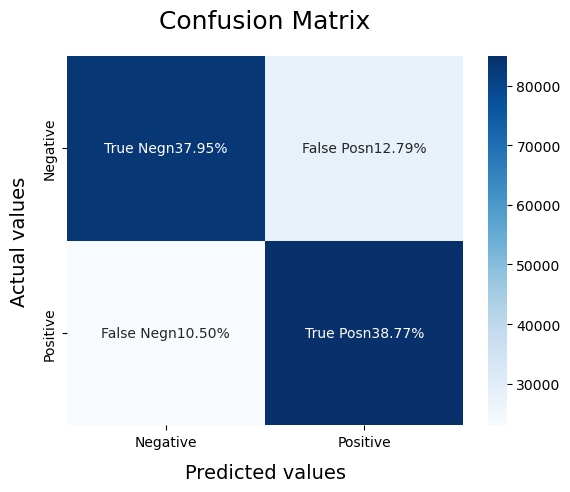

In [66]:
# Model-1 : Bernoulli Naive Bayes.
BNBmodel = BernoulliNB()
start = time.time()
BNBmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

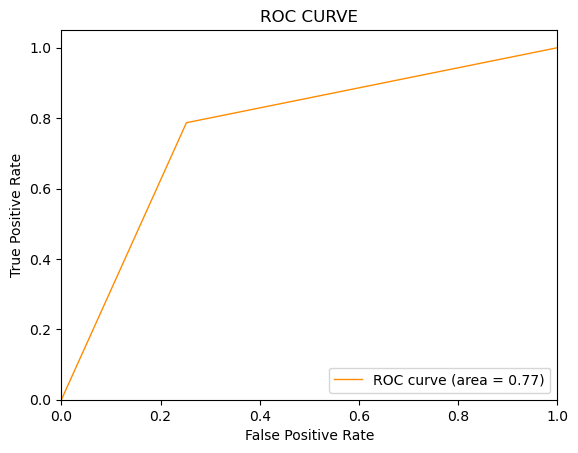

In [67]:
# Plot the ROC-AUC Curve for model-1 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

The execution time of this model is 21.18 seconds

              precision    recall  f1-score   support

           0       0.77      0.75      0.76    111228
           1       0.75      0.77      0.76    107994

    accuracy                           0.76    219222
   macro avg       0.76      0.76      0.76    219222
weighted avg       0.76      0.76      0.76    219222



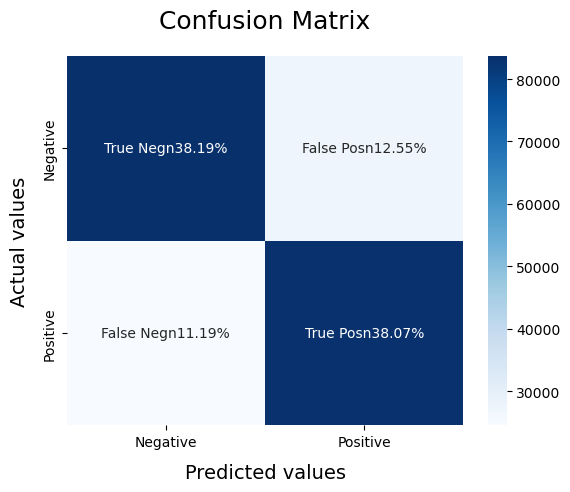

In [68]:
# Model-2 : SVM (Support Vector Machine).
SVCmodel = LinearSVC()
start = time.time()
SVCmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

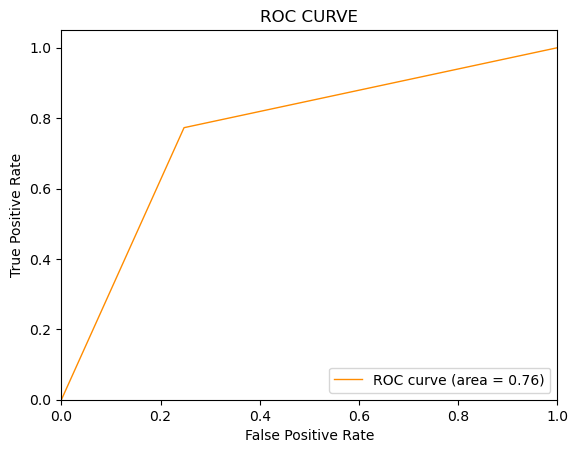

In [69]:
# Plot the ROC-AUC Curve for model-2 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

The execution time of this model is 111.99 seconds

              precision    recall  f1-score   support

           0       0.79      0.77      0.78    111228
           1       0.77      0.79      0.78    107994

    accuracy                           0.78    219222
   macro avg       0.78      0.78      0.78    219222
weighted avg       0.78      0.78      0.78    219222



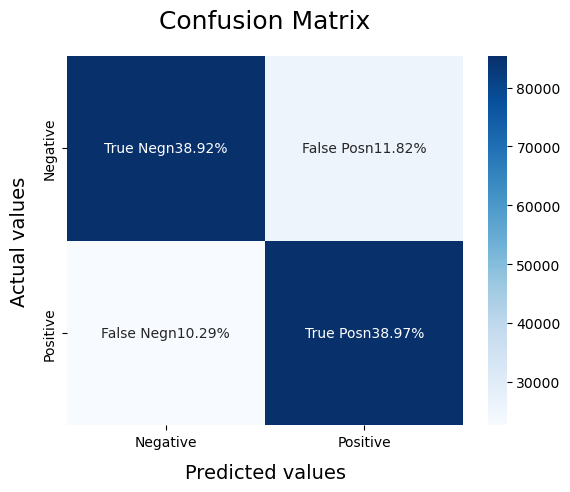

In [70]:
# Model-3 : Logistic Regression.
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
start = time.time()
LRmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

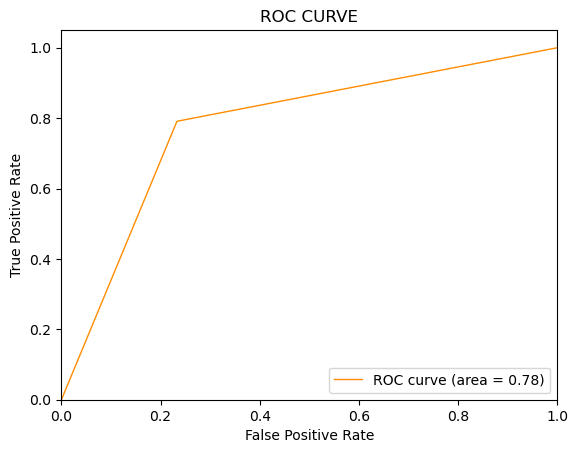

In [71]:
# Plot the ROC-AUC Curve for model-3 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

		 The training execution time of this model is 198.86 seconds

              precision    recall  f1-score   support

           0       0.72      0.71      0.72    111228
           1       0.71      0.72      0.71    107994

    accuracy                           0.71    219222
   macro avg       0.71      0.71      0.71    219222
weighted avg       0.71      0.71      0.71    219222

		The test execution time of this model is 0.92 seconds 



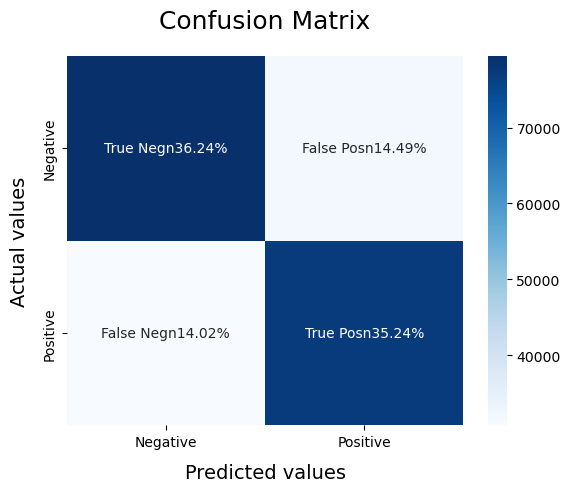

In [72]:
# Model-4: Decision Tree
clf = DecisionTreeClassifier() ## Create Decision Tree classifer object
start1 = time.time()
clf = clf.fit(X_train_reduced, y_train_reduced) # Training Decision Tree Classifer
LRmodel.fit(X_train_reduced, y_train_reduced)
end1 = time.time()
print("\t\t The training execution time of this model is {:.2f} seconds\n".format(end1-start1))
start2 = time.time()
model_Evaluate(clf) ## Predict the response for test dataset
y_pred5 = clf.predict(X_test)
end2 = time.time()
print("\t\tThe test execution time of this model is {:.2f} seconds \n".format(end2-start2))

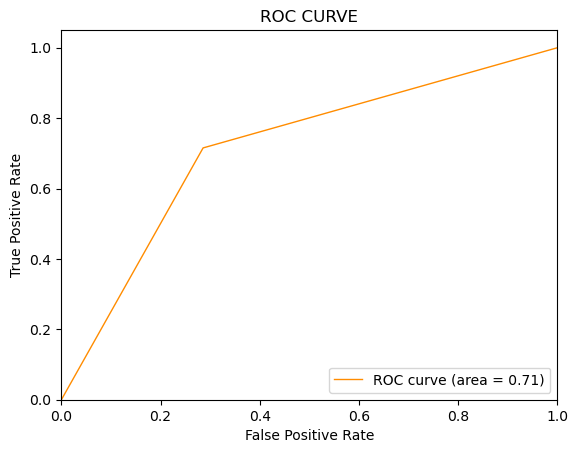

In [73]:
# Plot the ROC-AUC Curve for model-5 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred5)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

###  1️⃣1️⃣ `Conclusion` :
> After evaluating all models, we can conclude the following details :
><table>
    <thead>
        <tr>
            <th><b>Model Id</b></th>
            <th><b>Model Name</b></th>
            <th><b>Accuracy</b></th>
            <th><b>F1-score ( class 0 )</b></th>
            <th><b>F1-score ( class 1 )</b></th>
            <th><b>AUC Score</b></th>
            <th><b>Trainig execution time in seconds</b></th>
            <th><b>Testing execution time in seconds</b></th>
            <th><b>Nature of dataset used for training</b></th>
            <th><b>Nature of dataset used for testing</b></th>
        </tr>
        </thead>
    <tbody>
        <tr>
            <td><b>1</b></td>
            <td><b>Bernoulli Naive Bayes (BNB)</b></td>
            <td>73%</td> 
            <td>73%</td>
            <td>74%</td>
            <td>73%</td>
            <td>0.44</td>
            <td>0.77</td>
            <td><b>full dataset</b></td>
            <td><b>full dataset</b></td>
        </tr>
        <tr>
            <td><b>2</b></td>
            <td><b>Support Vector Machine (SVM)</b></td>
            <td>74%</td> 
            <td>73%</td>
            <td>75%</td>
            <td>74%</td>
            <td>34.38</td>
            <td>0.63</td>
            <td><b>full dataset</b></td>
            <td><b>full dataset</b></td>
        </tr>
        <tr>
            <td><b>3</b></td>
            <td><b>Logistic Regression (LR)</b></td>
            <td>74%</td> 
            <td>74%</td>
            <td>75%</td>
            <td>74%</td>
            <td>36.13</td>
            <td>0.67</td>
            <td><b>full dataset</b></td>
            <td><b>full dataset</b></td>
        </tr>
            <tr>
            <td><b>5</b></td>
            <td><b>Decision Tree (DT)</b></td>
            <td>69%</td> 
            <td>69%</td>
            <td>69%</td>
            <td>69%</td>
            <td>31.84</td>
            <td>0.76</td>
            <td><b>10% of the dataset</b></td>
            <td><b>full dataset</b></td>
        </tr>
    </tbody>
</table>